Sebastian Raschka, 2015  
`mlxtend`, a library of extension and helper modules for Python's data analysis and machine learning libraries

- GitHub repository: https://github.com/rasbt/mlxtend
- Documentation: http://rasbt.github.io/mlxtend/

View this page in [jupyter nbviewer](http://nbviewer.ipython.org/github/rasbt/mlxtend/blob/master/docs/sources/_ipynb_templates/regressor/linear_regression.ipynb)

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v -p matplotlib,numpy,scipy,mlxtend

Sebastian Raschka 
last updated: 2016-02-23 

CPython 3.5.1
IPython 4.0.3

matplotlib 1.5.1
numpy 1.10.4
scipy 0.17.0
mlxtend 0.3.1.dev0


In [2]:
%matplotlib inline

# LinearRegression

A implementation of Ordinary Least Squares simple and multiple linear regression.

> from mlxtend.regressor import LinearRegression

# Overview

Illustration of a simple linear regression model:
    
![](./LinearRegression_files/simple_regression.png)

In Ordinary Least Squares (OLS) Linear Regression, our goal is to find the line (or hyperplane) that minimizes the vertical offsets. Or in other words, we define the best-fitting line as the line that minimizes the sum of squared errors (SSE) or mean squared error (MSE) between our target variable (y) and our predicted output over all samples $i$ in our dataset of size $n$.

$$SSE =  \sum_i \big(\text{target}^{(i)} - \text{output}^{(i)}\big)^2$$

$$MSE = \frac{1}{n} \times SSE$$


Now, `LinearRegression` implements a linear regression model for performing ordinary least squares regression using one of the following three approaches:

- Normal Equations
- Gradient Descent
- Stochastic Gradient Descent


### Normal Equations (closed-form solution)

The closed-form solution should be preferred for "smaller" datasets where calculating (a "costly") matrix inverse is not a concern. For very large datasets, or datasets where the inverse of $[X^T X]$ may not exist (the matrix is non-invertible or singular, e.g., in case of perfect multicollinearity), the gradient descent or stochastic gradient descent approaches are to be preferred.

The linear function (linear regression model) is defined as:

$$y = w_0x_0 + w_1x_1 + ... + w_mx_m = \sum_{i=1}^{n} = \mathbf{w}^T\mathbf{x}$$

where $y$ is the response variable, $\mathbf{x}$ is an $m$-dimensional sample vector, and $\mathbf{w}$ is the weight vector (vector of coefficients). Note that $w_0$ represents the y-axis intercept of the model and therefore $x_0=1$.  

Using the closed-form solution (normal equation), we compute the weights of the model as follows:

$$ \mathbf{w} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^Ty$$

### Gradient Descent (GD)  and Stochastic Gradient Descent (SGD) 

See [Gradient Descent and Stochastic Gradient Descent](../general_concepts/gradient-optimization.md) and [Deriving the Gradient Descent Rule for Linear Regression and Adaline](../general_concepts/linear-gradient-derivative.md) for details.

Random shuffling is implemented as:

- for one or more epochs
    - randomly shuffle samples in the training set
        - for training sample *i*
            - compute gradients and perform weight updates

### References


- F. Galton. [Regression towards mediocrity in hereditary stature](http://www.jstor.org/stable/2841583). Journal of the Anthropological Institute of Great Britain and Ireland, pages 246–263, 1886.
- A. I. Khuri. [Introduction to linear regression analysis](http://onlinelibrary.wiley.com/doi/10.1111/insr.12020_10/abstract), by Douglas C. Montgomery, Elizabeth A. Peck, G. Geoffrey Vining. International Statistical Review, 81(2):318–319, 2013.
- D. S. G. Pollock. [The Classical Linear Regression Model](http://www.le.ac.uk/users/dsgp1/COURSES/MESOMET/ECMETXT/06mesmet.pdf).

# Examples

## Example 1 - Closed Form Solution

Intercept: 0.25
Slope: 0.81


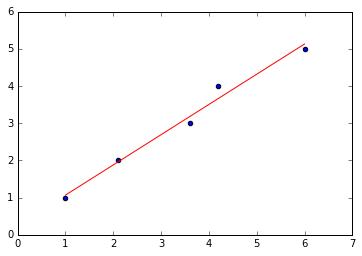

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.regressor import LinearRegression

X = np.array([ 1, 2.1, 3.6, 4.2, 6])[:, np.newaxis]
y = np.array([ 1, 2, 3, 4, 5])

ne_lr = LinearRegression(minibatches=None)
ne_lr.fit(X, y)

print('Intercept: %.2f' % ne_lr.w_[0])
print('Slope: %.2f' % ne_lr.w_[1])

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')    
    return

lin_regplot(X, y, ne_lr)
plt.show()

## Example 2 - Gradient Descent

Epoch: 1000/1000 | Cost 0.08 | Elapsed: 0:00:00 | ETA: 0:00:00

Intercept: 0.25
Slope: 0.81


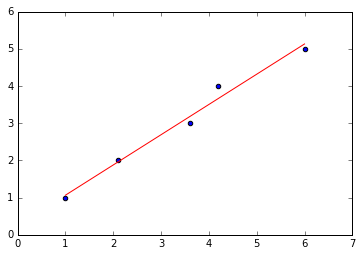

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.regressor import LinearRegression

X = np.array([ 1, 2.1, 3.6, 4.2, 6])[:, np.newaxis]
y = np.array([ 1, 2, 3, 4, 5])

gd_lr = LinearRegression(eta=0.005, 
                         epochs=1000,
                         minibatches=1,
                         random_seed=123,
                         print_progress=3)
gd_lr.fit(X, y)

print('Intercept: %.2f' % gd_lr.w_[0])
print('Slope: %.2f' % gd_lr.w_[1])

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')    
    return

lin_regplot(X, y, gd_lr)
plt.show()

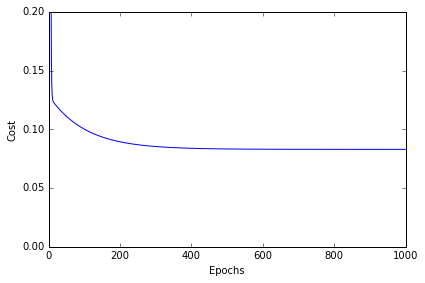

In [37]:
# Visualizing the cost to check for convergence and plotting the linear model:

plt.plot(range(1, gd_lr.epochs+1), gd_lr.cost_)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.ylim([0, 0.2])
plt.tight_layout()
plt.show()    

 **Tip**: I you are using gradient descent, consider standardizing the variables for better convergence of the algorithm.

Epoch: 1000/1000 | Cost 0.04 | Elapsed: 0:00:00 | ETA: 0:00:00

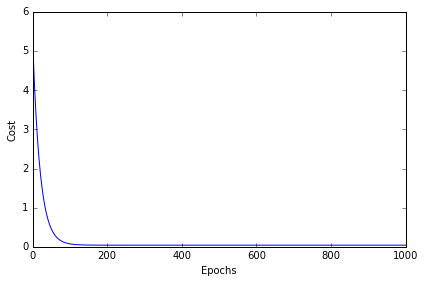

In [38]:
X_std = (X - np.mean(X)) / X.std()
y_std = (y - np.mean(y)) / y.std()
    
gd_lr.fit(X_std, y_std)

plt.plot(range(1, gd_lr.epochs+1), gd_lr.cost_)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.tight_layout()
plt.show()  

## Example 3 - Stochastic Gradient Descent

Intercept: 0.24
Slope: 0.81


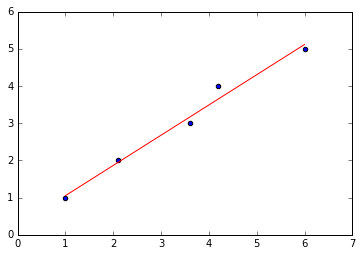

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.regressor import LinearRegression

X = np.array([ 1, 2.1, 3.6, 4.2, 6])[:, np.newaxis]
y = np.array([ 1, 2, 3, 4, 5])

sgd_lr = LinearRegression(eta=0.01, 
                          epochs=100, 
                          random_seed=0, 
                          minibatches=len(y),
                          zero_init_weight=True)
sgd_lr.fit(X, y)

print('Intercept: %.2f' % sgd_lr.w_[0])
print('Slope: %.2f' % sgd_lr.w_[1])

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')    
    return

lin_regplot(X, y, sgd_lr)
plt.show()

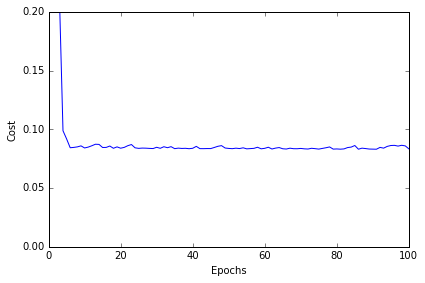

In [40]:
plt.plot(range(1, sgd_lr.epochs+1), sgd_lr.cost_)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.ylim([0, 0.2])
plt.tight_layout()
plt.show()  

## Example 3 - Stochastic Gradient Descent with Minibatches

Intercept: 0.24
Slope: 0.81


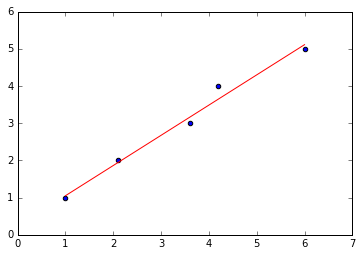

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.regressor import LinearRegression

X = np.array([ 1, 2.1, 3.6, 4.2, 6])[:, np.newaxis]
y = np.array([ 1, 2, 3, 4, 5])

sgd_lr = LinearRegression(eta=0.01, 
                          epochs=100, 
                          random_seed=0, 
                          minibatches=3,
                          zero_init_weight=True)
sgd_lr.fit(X, y)

print('Intercept: %.2f' % sgd_lr.w_[0])
print('Slope: %.2f' % sgd_lr.w_[1])

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')    
    return

lin_regplot(X, y, sgd_lr)
plt.show()

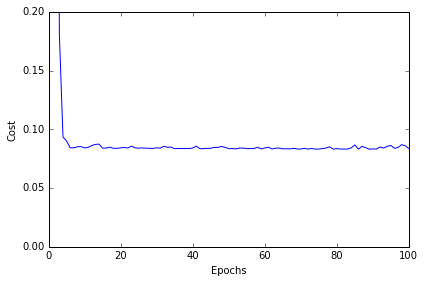

In [44]:
plt.plot(range(1, sgd_lr.epochs+1), sgd_lr.cost_)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.ylim([0, 0.2])
plt.tight_layout()
plt.show()  

# API

In [8]:
with open('../../api_modules/mlxtend.regressor/LinearRegression.md', 'r') as f:
    print(f.read())

## LinearRegression

*LinearRegression(solver='normal equation', eta=0.01, epochs=50, random_seed=None, shuffle=False, zero_init_weight=False)*

Ordinary least squares linear regression.

**Parameters**

- `solver` : {'gd', 'sgd', 'normal equation'} (default: 'normal equation')

    Method for solving the cost function. 'gd' for gradient descent,
    'sgd' for stochastic gradient descent, or 'normal equation' (default)
    to solve the cost function analytically.

- `eta` : float (default: 0.1)

    Learning rate (between 0.0 and 1.0);
    ignored if solver='normal equation'.

- `epochs` : int (default: 50)

    Passes over the training dataset;
    ignored if solver='normal equation'.

- `shuffle` : bool (default: False)

    Shuffles training data every epoch if True to prevent circles;
    ignored if solver='normal equation'.

- `random_seed` : int (default: None)

    Set random state for shuffling and initializing the weights;
    ignored if solver='normal equation'.

- `zero_init